# Third Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/ThirdSession.ipynb)


## Discrete Dynamical System
This section is the discrete version of Continous Dynamical System of the second session.
      
A discrete dynamical system is a sequence $\begin{cases} a_{n+1}=f(a_{n},n) \\ a_{0}=b_{0}\end{cases}$

If $f$ depends only on $a_{n}$, the discrete dynamical system is called autonomous. Again we will assume $f\in C^{\infty}(\mathbb{R})$

Question time!!

The solution of $a=f(a)$ are called equilibrium points.

- if $|f'(a)|<1$ then the equilibrium points
- if $|f'(a)|>1$ then the point is unstable
- if $|f'(a)|=1$ then nothing can be sayed. In fact $f(x)=x$ has an infinite number of stable equilibrium points, while $f(x)=-x$ has only 0 as equilibrium point which is unstable, while for $f(x)=\frac{1}{2}x^{2}+x$ the equilibrium point $0$ is repulsive for the right and attractive for the left.

Notice that the sequence $a_{n+1}=-a_{n}$ does not have a limit for almost all starting points, so in general convergence is not guaranteed.

Howewer, unlike continous dynamical systems, they always have a solution.


Let's now do some simulations.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
class DiscreteDynamicalSystem1D(object):
    def __init__(self):
        super().__init__()

    def equation(a,n):
        pass
  
    def solve(self,a0,n):
        sol=np.zeros(n+1);
        sol[0]=a0
        for i in range(1,n+1):
            sol[i]=self.equation(sol[i-1],i-1)
        return sol    
    def plot(self,alist,n):
        for a0 in alist:
            sol=self.solve(a0,n)
            plt.plot(np.arange(n+1),sol)
            plt.xlabel("Time")
            plt.ylabel("X")

    
class AutonomousDiscreteDynamicalSystem1D(object):
    def __init__(self):
        super().__init__()

    def autonomous_equation(self,a):
        pass
    
    def equation(self,a,n):
        return self.autonomous_equation(a)
  
    def solve(self,a0,n):
        sol=np.zeros(n+1);
        sol[0]=a0
        for i in range(1,n+1):
            sol[i]=self.equation(sol[i-1],i-1)
        return sol    
    def plot(self,alist,n):
        for a0 in alist:
            sol=self.solve(a0,n)
            plt.plot(np.arange(n+1),sol)
            plt.xlabel("Time")
            plt.ylabel("X")
    def cobbweb_plot(self,a0,n):
        sol=self.solve(a0,n)
        x=np.linspace(np.min(sol)-(np.max(sol)-np.min(sol))/2,np.max(sol)+(np.max(sol)-np.min(sol))/2,100000)
        plt.plot(x,x)
        x_path=np.zeros(2*n)
        y_path=np.zeros(2*n)
        x_path[0]=sol[0]
        y_path[0]=0
        x_path[1]=sol[0]
        y_path[1]=sol[1]
        ###Constructing_path
        for i in range(2,2*n,2):
            x_path[i]=y_path[i-1]
            y_path[i]=y_path[i-1]
            x_path[i+1]=x_path[i]
            y_path[i+1]=sol[i//2+1]
        plt.plot(x,self.autonomous_equation(x))
        plt.plot(x_path,y_path)          
        plt.xlabel("X")
        plt.ylabel("f(X)")
        
    



Now let's study $$\begin{cases} a_{n+1}=ca_{n} \\ a_{0}=b_{0} \end{cases}$$ with $c<1$.

This system has explicit solution $$a_{n}=c^{n}b_{0}$$ so it converges to $0$ for $b_{0}<1$.
Let's try to verify this.

In [75]:
class ExponentialSequence(AutonomousDiscreteDynamicalSystem1D):
  def __init__(self,c):
    super().__init__()
    self.c=c

  def autonomous_equation(self,a):
    return self.c*a



In [76]:
expseq=ExponentialSequence(0.5)

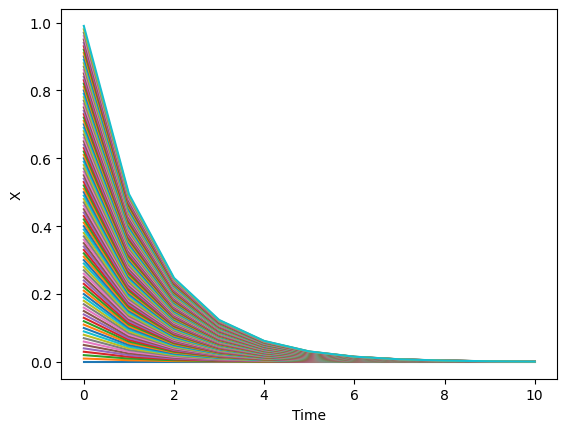

In [77]:
expseq.plot(np.arange(100)/100,10)


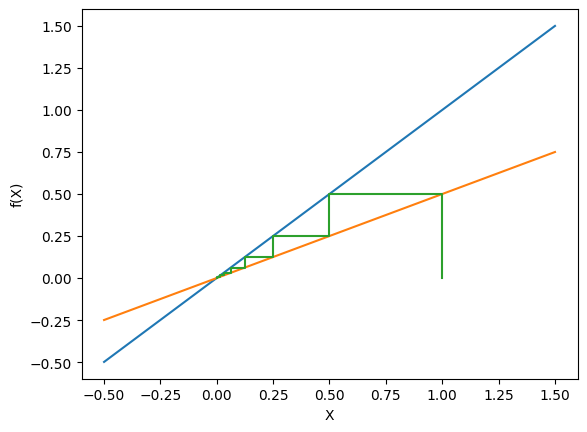

In [78]:
expseq.cobbweb_plot(1,10)


Now let's study $$\begin{cases} a_{n}=a_{n-1}^3 \\ a_{0}=b_{0} \end{cases}$$
This system has 3 equilibrium points $0$ (with $f'(0)=0$ so it is stable), $-1$ and $1$ (with derivative 3 so they are unstable).

In [79]:
class CubicSequence(AutonomousDiscreteDynamicalSystem1D):
  def __init__(self):
    super().__init__()

  def autonomous_equation(self,a):
    return a**3


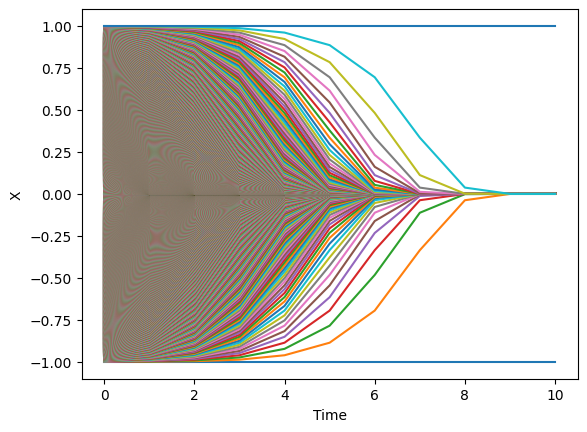

In [80]:
cubic=CubicSequence()
cubic.plot(np.arange(-2000,2001)/2000,10)

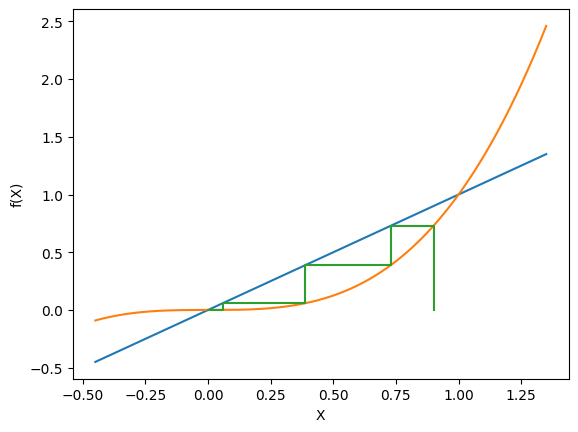

In [81]:
cubic.cobbweb_plot(0.9,10)

### Do you like chaos?

We will know see a recursive sequence which behaves chaotically in some cases. It is based on a function that you have already seen:
$$f(x)=rx(1-x)$$
Question time: what is the name of this function?

In [84]:
class ChaoticSequence(AutonomousDiscreteDynamicalSystem1D):
  def __init__(self,r):
    super().__init__()
    self.r=r

  def autonomous_equation(self,a):
    return self.r*a*(1-a)


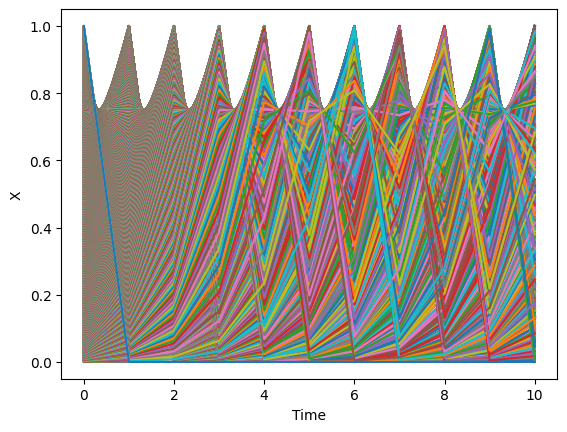

In [86]:
chaos=ChaoticSequence(4)
chaos.plot(np.arange(0,2001)/2000,10)


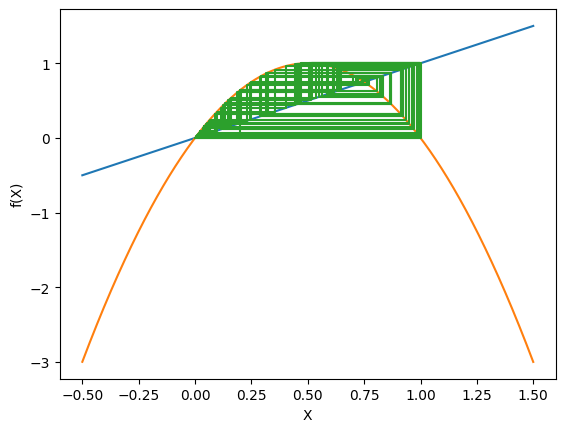

In [94]:
chaos.cobbweb_plot(0.2,100)

## What about stability of nonlinear functions in $\mathbb{R}^{n}$?

In $\mathbb{R^{n}}$ things get a lot more complicated. 

Here are the most useful results in my opinion.

Let $x^{\star}$ an equilibrium point of a continous dynamical system 
- if $J(f)$ is nonsingular and has all strictly negative real part eigenvalues than the point is locally attractive.
- if $J(f)$ is nonsingular and has at at least a positive real part eigenvalues tha the point is unstable
- if $J(f)$ is nonsingular and has all strictly positive real part eigenvalues than the point is locally repulsive.

Let $x^{\star}$ an equilibrium point of a discrete dynamical system 
- if $J(f)$ has all eigenvalues with modulus strictly lesser than one, no one with modulus equal to one then the point is locally attractive.
- if $J(f)$ has at least an eigenvalues with modulus strictly greaten than one,no one with modulus equal to one then the point is locally unstable.
- if $J(f)$ has all  eigenvalues with modulus strictly greaten than one, no one with modulus equal to one then is locally repulsive.
